In [19]:
import pyspark as ps    # for the pyspark suite
from pyspark.sql.types import *
from datetime import datetime
import json

spark = ps.sql.SparkSession.builder \
            .master("local[4]") \
            .appName("sparkSQL exercise") \
            .getOrCreate()

sc = spark.sparkContext 

In [20]:
def apply_json(input_lst):
    try:
        return json.loads(input_lst)['animals'][0]                                               
    except:
        return None 

In [3]:
# data_filepath = '../data/json_dump/output_4994.json'
data_filepath = '../src/valid_json_string.JSON'


data = sc.textFile(data_filepath).map(apply_json) #reads in the json file

In [4]:
print(data)
#create a pipeline to mash dataframes

# df_temp = spark.read.json(data_filepath, multiLine = True)

PythonRDD[2] at RDD at PythonRDD.scala:53


In [5]:
#remove outer dictionary from every file


In [6]:
df = spark.read.json(data_filepath, multiLine = True)

In [7]:
df.count()

19

In [8]:
df.printSchema()

root
 |-- _links: struct (nullable = true)
 |    |-- organization: struct (nullable = true)
 |    |    |-- href: string (nullable = true)
 |    |-- self: struct (nullable = true)
 |    |    |-- href: string (nullable = true)
 |    |-- type: struct (nullable = true)
 |    |    |-- href: string (nullable = true)
 |-- age: string (nullable = true)
 |-- attributes: struct (nullable = true)
 |    |-- declawed: string (nullable = true)
 |    |-- house_trained: boolean (nullable = true)
 |    |-- shots_current: boolean (nullable = true)
 |    |-- spayed_neutered: boolean (nullable = true)
 |    |-- special_needs: boolean (nullable = true)
 |-- breeds: struct (nullable = true)
 |    |-- mixed: boolean (nullable = true)
 |    |-- primary: string (nullable = true)
 |    |-- secondary: string (nullable = true)
 |    |-- unknown: boolean (nullable = true)
 |-- coat: string (nullable = true)
 |-- colors: struct (nullable = true)
 |    |-- primary: string (nullable = true)
 |    |-- secondary: strin

In [9]:
# dogs = parts.map(lambda p: Row(id=p[0],
#  age=int(p[1].strip())))

In [21]:
df.show(10)

+--------------------+-----+--------------------+--------------------+----+------+--------------------+--------------------+--------+-------------------+------+--------+---------+----------------------+---------------+------+---------------------+--------------------+------+-------+---------+--------------------+----+----+--------------------+------+
|              _links|  age|          attributes|              breeds|coat|colors|             contact|         description|distance|        environment|gender|      id|     name|organization_animal_id|organization_id|photos|primary_photo_cropped|        published_at|  size|species|   status|   status_changed_at|tags|type|                 url|videos|
+--------------------+-----+--------------------+--------------------+----+------+--------------------+--------------------+--------+-------------------+------+--------+---------+----------------------+---------------+------+---------------------+--------------------+------+-------+---------+-

In [10]:
df_new = df.select('id', 'age', 'gender', 'primary_photo_cropped', 'status', 'status_changed_at', 'description')

In [22]:
df_new.show(10)

+--------+-----+------+---------------------+---------+--------------------+--------------------+
|      id|  age|gender|primary_photo_cropped|   status|   status_changed_at|         description|
+--------+-----+------+---------------------+---------+--------------------+--------------------+
|48549326|Adult|  Male|                 null|adoptable|2020-07-21T10:04:...|Handsome fellow, ...|
|48549322|Adult|  Male|                 null|adoptable|2020-07-21T10:04:...|                null|
|48549323|Adult|Female|                 null|adoptable|2020-07-21T10:04:...|                null|
|48549325|Adult|Female|                 null|adoptable|2020-07-21T10:04:...|                null|
|48549318|Adult|Female|                 null|adoptable|2020-07-21T10:04:...|                null|
|48549314|Young|Female|                 null|adoptable|2020-07-21T10:03:...|Meet Sassy/MS! Th...|
|48549315| Baby|Female|                 null|adoptable|2020-07-21T10:03:...|Meet Dashia/MS!! ...|
|48549316| Baby|Fema

In [11]:
dropped_df = df_new.na.drop()

In [12]:
dropped_df.show()

+---+---+------+---------------------+------+-----------------+-----------+
| id|age|gender|primary_photo_cropped|status|status_changed_at|description|
+---+---+------+---------------------+------+-----------------+-----------+
+---+---+------+---------------------+------+-----------------+-----------+



In [13]:
dropped_df.printSchema()

root
 |-- id: long (nullable = true)
 |-- age: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- primary_photo_cropped: string (nullable = true)
 |-- status: string (nullable = true)
 |-- status_changed_at: string (nullable = true)
 |-- description: string (nullable = true)



In [14]:
dropped_df.createOrReplaceTempView("dog_data")

In [15]:
result = spark.sql('''SELECT gender,   
                        COUNT(*) AS Number
                        FROM dog_data
                        GROUP BY gender
                        ORDER BY COUNT(*) desc''')
result.show(20)

+------+------+
|gender|Number|
+------+------+
+------+------+



In [16]:
result.head()

In [17]:
plot_gender = result.toPandas()
plot_gender['gender']
plot_gender.dropna(inplace=True)

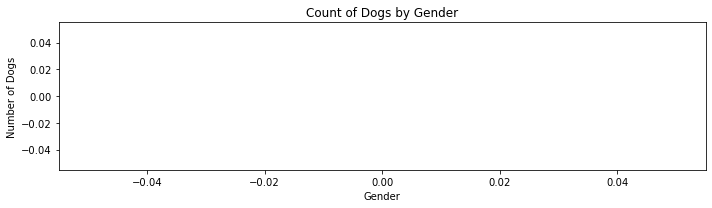

In [18]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, figsize=(10,3))
ax.bar(x = plot_gender['gender'], height=plot_gender['Number'])
ax.set_title("Count of Dogs by Gender")

ax.set_xlabel('Gender')
ax.set_ylabel('Number of Dogs')
plt.tight_layout()
plt.show()